In [1]:
import pandas as pd
import numpy as np
import time
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy import sparse
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
import pickle
import ast
import networkx as nx
from networkx.algorithms import bipartite

In [2]:
def save_obj(obj, name ):
    with open('/Users/Mengying/Desktop/Networks/Project/MSD/Data_userprofile/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('/Users/Mengying/Desktop/Networks/Project/MSD/Data_userprofile/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [3]:
train = pd.read_csv('/Users/Mengying/Desktop/Networks/Project/MSD/Data_userprofile/train.csv')
test_cluster_batch = pd.read_csv('/Users/Mengying/Desktop/Networks/Project/MSD/Data_userprofile/test_cluster_batch.csv')
train_clustered = pd.read_csv('/Users/Mengying/Desktop/Networks/Project/MSD/Data_userprofile/train_clustered.csv')

users_dict = load_obj('users_dict')
tracks_dict = load_obj('tracks_dict')
clusters_dict = load_obj('clusters_dict')

In [208]:
test_mini.head(1)

,user,count,track_id,song_id,artist,song_y,duration,loudness,tempo,song_hotness,...,artist_tag,predict,CF,dummy,like,CF_raw,SONG_AVG,SONG_Q,track_label,user_label
0,82ef16cb5e45c1afe71979afcc6dbae8fdd36aeb,8,TRBDQUF128F42AE54C,SOBBFWL12A8C140087,Daler Mehndi;Chitra,Rang De Basanti,363.80689,-7.403,105.026,0.363686,...,[b'singer' b'dancer' b'indian'],49,2.0,0,2,9.616318,8.628472,5.0,2920,63564


In [207]:
len(test_mini[test_mini.like == test_mini.CF])/len(test_mini)

0.3055872291904219

In [212]:
len(test_mini[(test_mini.CF == test_mini.like) & (test_mini.CF==2)])/len(test_mini)

0.13112884834663627

In [4]:
test_mini = test_cluster_batch[test_cluster_batch['CF']!=-99] #877

In [75]:
len(test_mini.track_id.unique()) #344

344

In [76]:
len(test_mini.user.unique()) # 873

873

In [25]:
test_user_history = set(train[train.user.isin(test_mini.user)]['track_id']) # 1910 history records

In [183]:
all_songs = test_user_history|set(test_mini.track_id.values)

In [177]:
# users that have listened to test data songs
train['_flag'] = train.apply(lambda x: 1 if x['track_id'] in set(test_mini['track_id']) else 0,axis=1)
train['_flag'] = train.groupby(["user"])["_flag"].transform('sum')
filtered_train = train[train['_flag']>=1]

# users that have listened to test_user_history
train['_flag2'] = train.apply(lambda x: 1 if x['track_id'] in  test_user_history else 0,axis=1)
train['_flag2'] = train.groupby(["user"])["_flag2"].transform('sum')
filtered_train2 = train[train['_flag2']>=1] 

In [180]:
valuable_user = set(filtered_train2.user.values)&set(filtered_train.user.values) # listened to both

In [181]:
len(valuable_user)

105986

In [184]:
train_mini = train[(train.track_id.isin(all_songs)) & (train.user.isin(all_users))] # 286,480

In [185]:
train_mini.shape

(286480, 22)

In [186]:
history = list(zip(train_mini.user.values,train_mini.track_id.values))
len(history)

286480

In [187]:
# Bipariate
B = nx.Graph()
B.add_nodes_from(train_mini.user.values, bipartite=0) # user
B.add_nodes_from(train_mini.track_id.values, bipartite=1) # song
# Add edges only between nodes of opposite node sets
B.add_edges_from(history)

In [172]:
len(B.edges)

6296

In [188]:
nx.is_connected(B)

True

In [189]:
bottom_nodes, top_nodes = bipartite.sets(B)

In [190]:
len(bottom_nodes)

105986

In [191]:
len(top_nodes) # missing 1 song: nobody has listened to this plus some other songs in history

690

In [192]:
# one mode projection
projection = bipartite.weighted_projected_graph(B, top_nodes)

/anaconda3/envs/si618/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


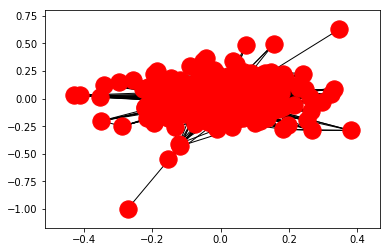

In [195]:
nx.draw_networkx(projection, with_labels=False)
plt.show()

In [193]:
len(projection.nodes)

690

In [128]:
len(bottom_nodes)

156

In [194]:
projection.degree()

DegreeView({'TRANMKF128E07995A8': 239, 'TRATBNG128F92CADA8': 377, 'TRAPNQZ128F145B04E': 27, 'TRADXCO128F426B26D': 14, 'TRANWCP12903CF31D3': 18, 'TRAGETA128F4272C38': 36, 'TRAJNZF12903CB22A9': 194, 'TRAKHXX128E07877EB': 218, 'TRAPMTY128F1459DA1': 75, 'TRALKBS128F423BB4C': 101, 'TRACCJA128F149A144': 118, 'TRAJCOV128F92FDF3F': 3, 'TRBDIOP128EF35F99C': 280, 'TRAIGZU128F4236EB6': 190, 'TRBEQFT128F146BD6D': 249, 'TRAYQLP128F92FA224': 538, 'TRBDNDG128E0782EDC': 363, 'TRBCIDX128F422F215': 243, 'TRAUEYX12903CEAF48': 150, 'TRAXLPR128F428E466': 312, 'TRARJEM128F92E444D': 203, 'TRAXLIU128E07860D4': 195, 'TRAVYNN128F425EBBC': 188, 'TRBAMES128F14947D4': 21, 'TRAPVXU128F149E7CD': 312, 'TRAVYRR128F423C597': 98, 'TRAVXEP128F14539AE': 162, 'TRBEKNV128F9326A8A': 163, 'TRBHYTA128F93425AC': 195, 'TRAOOGD128F92E4768': 321, 'TRACTIE128F92E473B': 290, 'TRAWYNV128F92F5E7E': 306, 'TRAWEIX128F14B0F05': 313, 'TRAQEVV128EF34E413': 204, 'TRBFQII128F930D519': 21, 'TRBACGF128F92C5774': 218, 'TRAGNGY12903C9CD76': 84, 

In [198]:
len(projection["TRANMKF128E07995A8"])

239

In [199]:
projection["TRANMKF128E07995A8"]

AtlasView({'TRAGEVS128F145FEAD': {'weight': 1}, 'TRAADLN128F14832E9': {'weight': 16}, 'TRBALRR128F429625D': {'weight': 2}, 'TRAADVH128EF34DE7A': {'weight': 2}, 'TRBGKGR128F92EE206': {'weight': 1}, 'TRAXLZU12903D05F94': {'weight': 4}, 'TRATBNG128F92CADA8': {'weight': 2}, 'TRAYABW128F4235888': {'weight': 1}, 'TRALOBE12903CDA6C5': {'weight': 1}, 'TRBDMIN128F147FCBB': {'weight': 160}, 'TRANBUW128F933C645': {'weight': 18}, 'TRAWRKT128E0788857': {'weight': 1}, 'TRAJNZF12903CB22A9': {'weight': 1}, 'TRAWBHE12903CBC4CB': {'weight': 11}, 'TRAKLHO128F42BA554': {'weight': 2}, 'TRAAMES128F42AF068': {'weight': 3}, 'TRAUTTP128F425BDEB': {'weight': 2}, 'TRAEVRI128F93608F3': {'weight': 34}, 'TRAUURC128E078EC6E': {'weight': 2}, 'TRASTIS128F92FA998': {'weight': 1}, 'TRANHYE128F92DE232': {'weight': 1}, 'TRBBQGV12903CB5CD3': {'weight': 1}, 'TRBDIOP128EF35F99C': {'weight': 1}, 'TRAAEEH128E0795DFE': {'weight': 2}, 'TRBDNDG128E0782EDC': {'weight': 3}, 'TRAYQLP128F92FA224': {'weight': 8}, 'TRBAUHT128F92F0657':

In [200]:
projection["TRANMKF128E07995A8"]['TRAADLN128F14832E9']['weight']

16

In [213]:
nx.write_gpickle(projection, "/Users/Mengying/Desktop/Networks/Project/MSD/Data_userprofile/projection.gpickle")

In [ ]:
#projection=nx.read_gpickle("test.gpickle")